In [2]:
import wave
def check_mono_or_stereo(file_path):
    with wave.open(file_path) as audio_file:
        channels = audio_file.getnchannels()

        if channels == 1:
            print("Mono audio")
        elif channels == 2:
            print("Stereo audio")
        else:
            print(f"Audio has {channels} channels, which is not standard mono or stereo.")

# Replace 'your_audio_file.wav' with the actual path to your audio file
file_path = 'Project_Swar_1.wav'
check_mono_or_stereo(file_path)

Stereo audio


(0.0, 4.269958333333333)

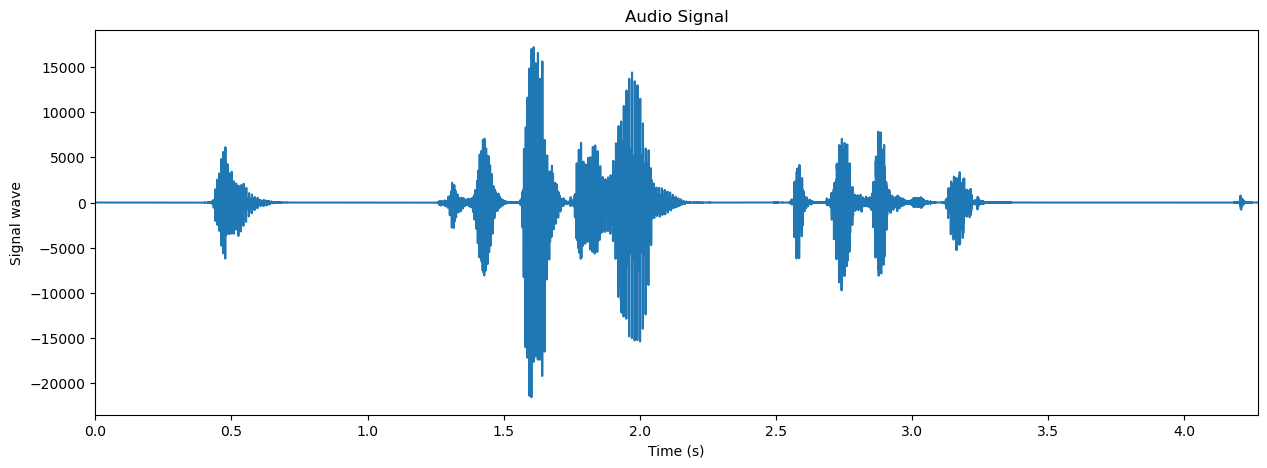

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import wave

obj=wave.open("Project_Swar_1.wav","rb")

signal_freq=obj.getframerate()
n_samples=obj.getnframes()
signal_wave=obj.readframes(-1)

obj.close()

t_audio=n_samples/signal_freq

signal_array=np.frombuffer(signal_wave,dtype=np.int16)

time=np.linspace(0,t_audio,num=n_samples*2)

figure=plt.figure(figsize=(15,5))
plt.plot(time, signal_array)
plt.title('Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel("Signal wave")
plt.xlim(0,t_audio)


**Using Mic for input**

In [4]:
pip install pyaudio

   ---------------------------------------- 0.0/164.1 kB ? eta -:--:--
   -- ------------------------------------- 10.2/164.1 kB ? eta -:--:--
   -------------- ------------------------ 61.4/164.1 kB 656.4 kB/s eta 0:00:01
   ---------------------------------- ----- 143.4/164.1 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 164.1/164.1 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pyaudio
import wave

FRAMES_PER_BUFFER=3200
FORMAT=pyaudio.paInt16
CHANNELS=1
RATE=16000

p=pyaudio.PyAudio()

stream=p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    frames_per_buffer=FRAMES_PER_BUFFER,
)
print('Start Recording')
seconds=5
frames=[]

for i in range(0,int(RATE/FRAMES_PER_BUFFER)*seconds):
  data=stream.read(FRAMES_PER_BUFFER)
  frames.append(data)

stream.stop_stream()
stream.close()
p.terminate()

obj = wave.open('Output.wav', 'wb')
obj.setnchannels(CHANNELS)
obj.setsampwidth(p.get_sample_size(pyaudio.paInt16))  # Assuming 16-bit audio samples
obj.setframerate(RATE)
obj.writeframes(b"".join(frames))
obj.close()

obj.close()

print('recording successful')

Start Recording
recording successful
